## Import Dependancies

In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import pandas as pd

# Import Data

The csv was preprocessing in excel. 
- All null values were converted to 0
- A column was added for total number of people included in the booking.
- A column was added for total number of days in the stay. 

In [5]:
#IMPORT DATA
data_df = pd.read_csv('../Data/cleaned_hotel_bookings.csv')
data_df.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,babies,...,room_changes,booking_changes,deposit_type,agent_used,agent_id,company,days_in_waiting_list,customer_type,adr,reservation_status
0,Resort Hotel,0,342,July,0,0,0,2,0.0,0,...,0,3,No Deposit,0,0,0,0,Transient,0.0,Check-Out
1,Resort Hotel,0,737,July,0,0,0,2,0.0,0,...,0,4,No Deposit,0,0,0,0,Transient,0.0,Check-Out
2,Resort Hotel,0,7,July,0,1,1,1,0.0,0,...,1,0,No Deposit,0,0,0,0,Transient,75.0,Check-Out
3,Resort Hotel,0,13,July,0,1,1,1,0.0,0,...,0,0,No Deposit,1,304,0,0,Transient,75.0,Check-Out
4,Resort Hotel,0,14,July,0,2,2,2,0.0,0,...,0,0,No Deposit,1,240,0,0,Transient,98.0,Check-Out


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   total_stay                      119390 non-null  int64  
 7   adults                          119390 non-null  int64  
 8   children                        119386 non-null  float64
 9   babies                          119390 non-null  int64  
 10  country                         118902 non-null  object 
 11  market_segment                  119390 non-null  object 
 12  distribution_cha

In [8]:
data_df.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,room_changes,booking_changes,agent_used,agent_id,company,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,0.927599,2.500302,3.427900,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.124943,0.221124,0.863138,74.828319,10.775157,2.321149,101.831122
std,0.482918,106.863097,0.998613,1.908286,2.557439,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.330656,0.652306,0.343703,107.141953,53.943884,17.594721,50.535790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,69.290000
50%,0.000000,69.000000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,94.575000
75%,1.000000,160.000000,2.000000,3.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,152.000000,0.000000,0.000000,126.000000
max,1.000000,737.000000,19.000000,50.000000,69.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,1.000000,21.000000,1.000000,535.000000,543.000000,391.000000,5400.000000


## Questions About the Data
 - What is most correlated to cancellations.
     Possible ideas: bookings with larger lead times are probably more likely to cancel. 
 - What monthes see the most demand?
 - What day in the month sees the most demand
 
 
Guiding questions: If we are building an algorithm to predict demand, what would be need to know?

 
Prelim Investigation 
- Look at cancelations and look at heat map.
- Groupby months and plot number of reservations.
- Grouby by day and plot number of reservations. 
    You will likely see peaks in 7 day cycles.
- Do people with agents cancel more or less? 

# What has the highest correlation with canceling a booking?

<function matplotlib.pyplot.show(close=None, block=None)>

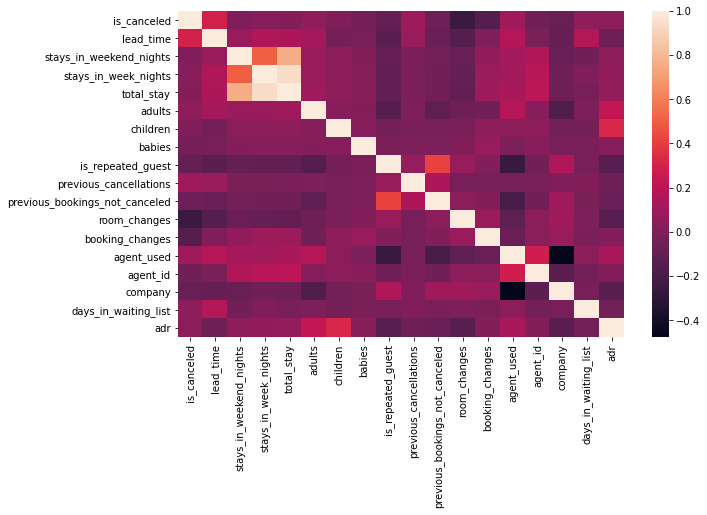

In [22]:
#import seaborn
import seaborn as sns

#create and plot heatmap for correlation exploration
plt.figure(figsize=(10,6))
sns.heatmap(data_df.corr())
plt.show

In [25]:
data_df.corr()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,room_changes,booking_changes,agent_used,agent_id,company,days_in_waiting_list,adr
is_canceled,1.000000,0.293123,-0.001791,0.024765,0.017779,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.247770,-0.144381,0.102068,-0.046529,-0.082995,0.054186,0.047557
lead_time,0.293123,1.000000,0.085671,0.165799,0.157167,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,-0.142220,0.000149,0.180031,-0.012640,-0.086250,0.170084,-0.063077
stays_in_weekend_nights,-0.001791,0.085671,1.000000,0.498969,0.762790,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,-0.076657,0.063281,0.126434,0.161427,-0.079977,-0.054151,0.049342
stays_in_week_nights,0.024765,0.165799,0.498969,1.000000,0.941005,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,-0.091036,0.096209,0.117194,0.195135,-0.043641,-0.002020,0.065237
total_stay,0.017779,0.157167,0.762790,0.941005,1.000000,0.105249,0.050864,0.022283,-0.106626,-0.015429,-0.053049,-0.097861,0.096498,0.136816,0.208637,-0.063793,-0.022652,0.067945
adults,0.060017,0.119519,0.091871,0.092976,0.105249,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.062009,-0.051673,0.186693,0.024994,-0.166778,-0.008283,0.230641
children,0.005048,-0.037622,0.045793,0.044203,0.050864,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,-0.013076,0.048949,0.045700,0.050576,-0.042624,-0.033273,0.324854
babies,-0.032491,-0.020915,0.018483,0.020191,0.022283,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.018570,0.083440,-0.006782,0.030266,-0.009459,-0.010621,0.029186
is_repeated_guest,-0.084793,-0.124410,-0.087239,-0.097245,-0.106626,-0.146426,-0.032859,-0.008943,1.000000,0.082293,0.418056,0.084161,0.012092,-0.255605,-0.052264,0.159723,-0.022235,-0.134314
previous_cancellations,0.110133,0.086042,-0.012775,-0.013992,-0.015429,-0.006738,-0.024730,-0.007501,0.082293,1.000000,0.152728,-0.030138,-0.026993,-0.029454,-0.018192,-0.001190,0.005929,-0.065646


It appears that there aren't any statisically significant relations between cancellations and any other feature. 
Though the correlation is small, lead time appears to have the highest impact on cancellations. 

In [26]:
#drop all bookings that weren't cancelled
canceled_df = data_df.loc[data_df['is_canceled']== 1,:]
print(canceled_df['is_canceled'].unique())
canceled_df.head()

[1]


,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,babies,...,room_changes,booking_changes,deposit_type,agent_used,agent_id,company,days_in_waiting_list,customer_type,adr,reservation_status
8,Resort Hotel,1,85,July,0,3,3,2,0.0,0,...,0,0,No Deposit,1,240,0,0,Transient,82.0,Canceled
9,Resort Hotel,1,75,July,0,3,3,2,0.0,0,...,0,0,No Deposit,1,15,0,0,Transient,105.5,Canceled
10,Resort Hotel,1,23,July,0,4,4,2,0.0,0,...,0,0,No Deposit,1,240,0,0,Transient,123.0,Canceled
27,Resort Hotel,1,60,July,2,5,7,2,0.0,0,...,0,0,No Deposit,1,240,0,0,Transient,107.0,Canceled
32,Resort Hotel,1,96,July,2,8,10,2,0.0,0,...,0,0,No Deposit,0,0,0,0,Transient,108.3,Canceled


In [ ]:
data_df = data_df[['hotel', 'is_canceled', 'lead_time',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country','is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr']]
data_df.head()

In [ ]:
data_df = data_df['company'].notna() == 1
data_df['company'].head()

In [ ]:
data_df['agent'] = data_df['agent'].fillna(0)
data_df['company'] = data_df['company'].fillna(0)
#data_df['agent'].unique()

## Split Data By Hotel

In [ ]:
data_df['hotel'].unique()

In [ ]:
len(data_df['hotel'].unique())

In [39]:
#SPLIT DATA BY HOTEL
resort_df = data_df.loc[data_df['hotel']=='Resort Hotel',:]
print(resort_df.shape)
resort_df.head()

(40060, 28)


,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,babies,...,room_changes,booking_changes,deposit_type,agent_used,agent_id,company,days_in_waiting_list,customer_type,adr,reservation_status
0,Resort Hotel,0,342,July,0,0,0,2,0.0,0,...,0,3,No Deposit,0,0,0,0,Transient,0.0,Check-Out
1,Resort Hotel,0,737,July,0,0,0,2,0.0,0,...,0,4,No Deposit,0,0,0,0,Transient,0.0,Check-Out
2,Resort Hotel,0,7,July,0,1,1,1,0.0,0,...,1,0,No Deposit,0,0,0,0,Transient,75.0,Check-Out
3,Resort Hotel,0,13,July,0,1,1,1,0.0,0,...,0,0,No Deposit,1,304,0,0,Transient,75.0,Check-Out
4,Resort Hotel,0,14,July,0,2,2,2,0.0,0,...,0,0,No Deposit,1,240,0,0,Transient,98.0,Check-Out


In [40]:
#SPLIT DATA BY HOTEL
city_df = data_df.loc[data_df['hotel']=='City Hotel',:]
print(city_df.shape)
city_df.head()

(79330, 28)


,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,babies,...,room_changes,booking_changes,deposit_type,agent_used,agent_id,company,days_in_waiting_list,customer_type,adr,reservation_status
38282,City Hotel,0,6,July,0,2,2,1,0.0,0,...,0,0,No Deposit,1,6,0,0,Transient,0.0,Check-Out
38283,City Hotel,1,88,July,0,4,4,2,0.0,0,...,0,0,No Deposit,1,9,0,0,Transient,76.5,Canceled
38284,City Hotel,1,65,July,0,4,4,1,0.0,0,...,0,0,No Deposit,1,9,0,0,Transient,68.0,Canceled
38285,City Hotel,1,92,July,2,4,6,2,0.0,0,...,0,0,No Deposit,1,9,0,0,Transient,76.5,Canceled
38286,City Hotel,1,100,July,0,2,2,2,0.0,0,...,0,0,No Deposit,1,9,0,0,Transient,76.5,Canceled


### Create Summary of Cancellations By Hotel

In [55]:
#calculate rate of cancellation for both the resort and city hotel
total_resort = resort_df.shape[0]
canceled_resort = resort_df['is_canceled'].sum()

total_city = city_df.shape[0]
canceled_city = city_df['is_canceled'].sum()

print('Resort Cancellation Rate:', "{:.0%}".format(canceled_resort/total_resort))
print('City Cancellation Rate:', "{:.0%}".format(canceled_city/total_city))

Resort Cancellation Rate: 28%
City Cancellation Rate: 42%


In [68]:
city_df['lead_time'].describe()

count    79330.000000
mean       109.735724
std        110.948526
min          0.000000
25%         23.000000
50%         74.000000
75%        163.000000
max        629.000000
Name: lead_time, dtype: float64

In [70]:
resort_df['lead_time'].describe()

count    40060.000000
mean        92.675686
std         97.285315
min          0.000000
25%         10.000000
50%         57.000000
75%        155.000000
max        737.000000
Name: lead_time, dtype: float64

## Prelim Explorations

In [87]:
by_city_room = city_df.drop(['hotel'], axis = 1)
by_city_room = by_city_room.groupby(['assigned_room_type']).sum()
by_city_room.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,room_changes,booking_changes,agent_used,agent_id,company,days_in_waiting_list,adr
assigned_room_type,,,,,,,,,,,,,,,,,,
A,26901,7005681,43474,120839,164313,101675,1830.0,179,1446,5858,7811,426,8681,51180,1617394,382856,231697,5510029.91
B,503,200916,1580,4283,5863,3302,593.0,26,44,67,231,1019,955,1764,36634,9388,7934,188117.81
C,15,11926,87,246,333,280,19.0,1,13,11,56,150,41,121,5130,2897,186,16180.81
D,4273,1160870,13669,36118,49787,31333,890.0,99,294,247,1214,4007,3354,13739,251275,96813,13428,1822769.69
E,540,132689,1748,4881,6629,4415,435.0,33,75,51,685,738,660,1776,47931,26214,1765,312072.46


In [74]:
city_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'total_stay',
       'adults', 'children', 'babies', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'room_changes', 'booking_changes', 'deposit_type',
       'agent_used', 'agent_id', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'reservation_status'],
      dtype='object')